# Preço de Imóveis 

### Nome: Maria Clara Borges
### Código: 23961

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imóveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

## Importando bibliotecas

In [1]:
#Bibliotecas para uso geral
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Bibliotecas machine learning
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Conhecendo os dados

In [3]:
#Lendo dados
dados = pd.read_csv("C:\\Users\\mborges\\Downloads\\MLRegressionAlura\\Preços_de_casas.csv")

In [4]:
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [5]:
#Quais fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [6]:
dados = dados.drop(columns = "Id")

Tentar verificar como essas características estão atreladas ao preço de venda das casas

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Coeficiente de Correlação de Pearson: permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [7]:
# Correlação
corr = dados.corr()

In [8]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

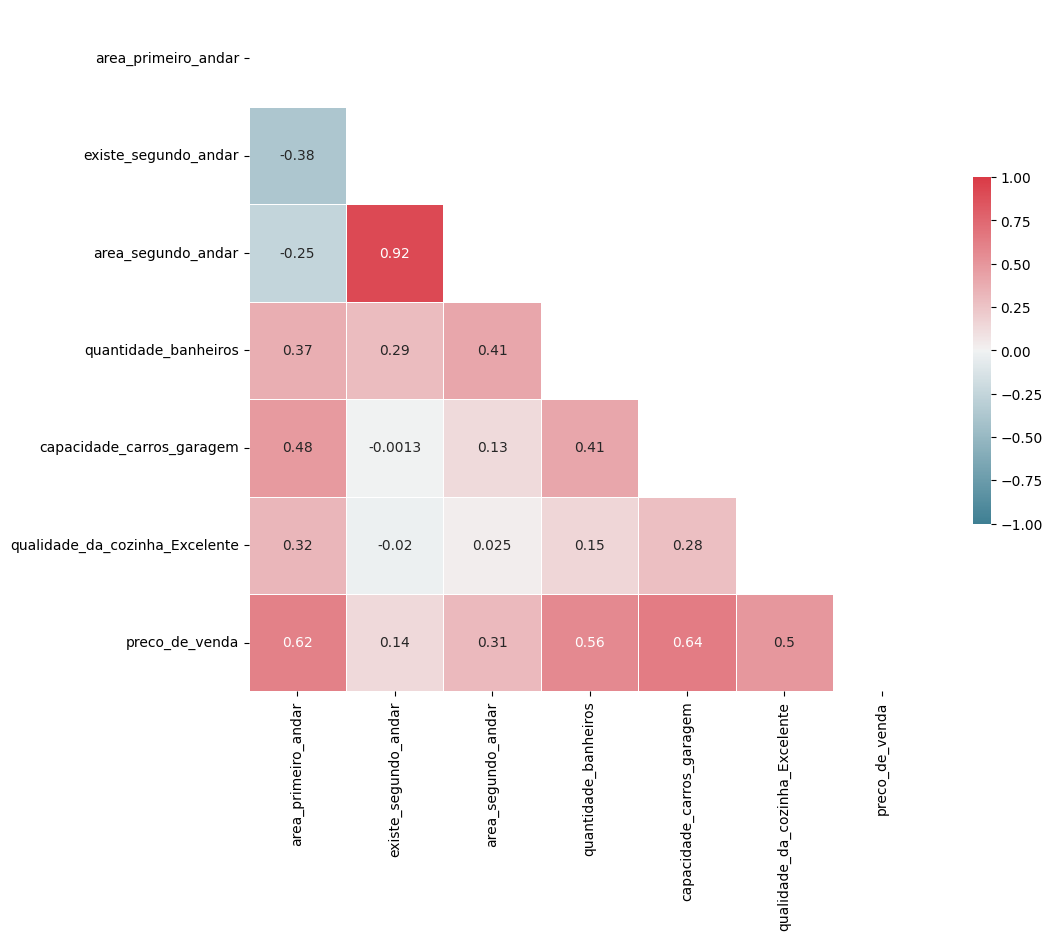

In [9]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()


- A correlação entre a capacidade de carros na garagem e a área do primeiro andar é 0.48 moderadamente positiva: **à medida que a capacidade de carros na garagem aumenta, a área do primeiro andar da casa tende a aumentar também.**


- Entre garagem para carros e quantidade de banheiros é moderadamente positiva (0.409281): **à medida que a capacidade da garagem aumenta, o número de banheiros também tende a aumentar.**


- Quando olhamos para a correlação entre a área do primeiro andar e a área do segundo andar, verificamos que é fraca e negativa (-0.25). **Isso sugere que, quando a área do primeiro andar de uma casa aumenta, a área do segundo andar tende a diminuir um pouco, e vice-versa.** Essa relação indica uma possível compensação entre as áreas dos dois andares, mas não é uma relação muito forte.

## Relacionando variáveis

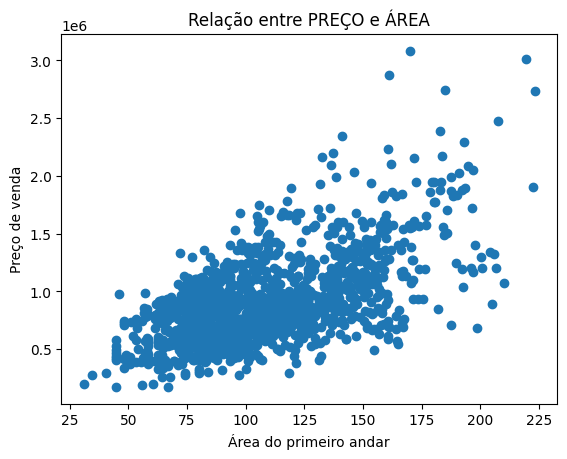

In [10]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda']) #scatter: gráfico de dispersão 
plt.title("Relação entre PREÇO e ÁREA")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")
plt.show()

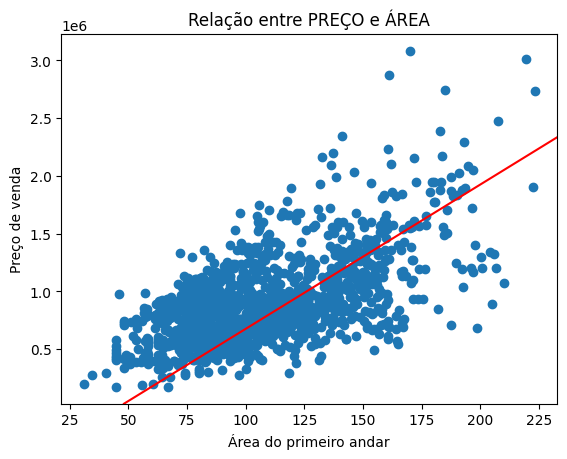

In [11]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2 = (190, 1800000), color='red')



plt.title("Relação entre PREÇO e ÁREA")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")
plt.show()




In [12]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override='red', trendline='ols')

Reta que relaciona o $m^2$ do primeiro andar e o preço da casa. Para explicar o preço da casa a partir do seu tamanho, dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

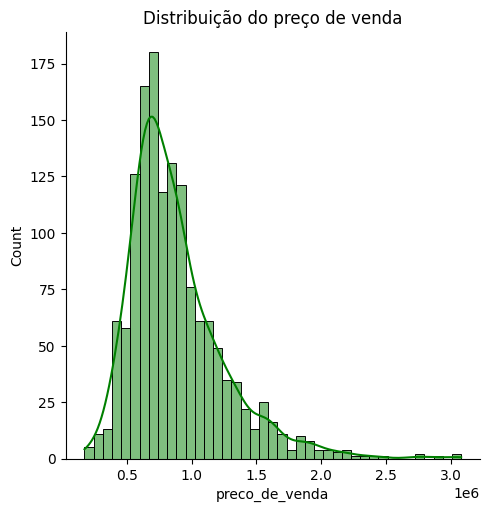

In [13]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [14]:
# Definindo y e X
y = dados['preco_de_venda'] #variável resposta
x = dados.drop(columns='preco_de_venda') #variável preditora

In [15]:
#Aplicando o split do y e X
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)  


In [16]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(x_train)
df_train['preco_de_venda'] = y_train

In [17]:
# ajustando o primeiro modelo de regressão linear para analisar como o tamanho do primeiro andar afeta o preço da casa
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()


## Analisando os coeficientes

(intensidade, direção e significância)




In [18]:
# visualizando os parametros
print(modelo_0.params)

Intercept              145397.302896
area_primeiro_andar      6905.925181
dtype: float64


 Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R$ 6.905 no valor da casa.

In [19]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     573.7
Date:                Thu, 29 May 2025   Prob (F-statistic):          1.21e-100
Time:                        17:23:39   Log-Likelihood:                -14117.
No. Observations:                1006   AIC:                         2.824e+04
Df Residuals:                    1004   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.454e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6905.9252. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.905,92.

## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [20]:
# observando o R²
modelo_0.rsquared

np.float64(0.3636291993675236)

36% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar.

64% da variação dos preços não está sendo explicada pelo tamanho do primeiro andar. Essa variação pode ser atribuída a outros fatores, como o número de banheiros ou quartos. Precisamos explorar essas variáveis para entender melhor o modelo.

## Entendendo o resíduo

In [21]:
# Quem são os residuos
modelo_0.resid

590     531581.741699
561    -108105.531128
156     686669.909313
573     481039.253654
596     -63260.170212
            ...      
1095   -129005.235833
1130     63947.120080
1294   -166926.608873
860    -160627.670212
1126   -182125.924854
Length: 1006, dtype: float64

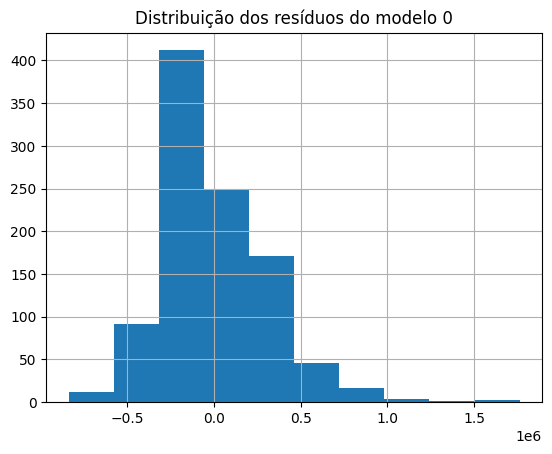

In [22]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos resíduos do modelo 0')
plt.show()

## Obtendo o R² da previsão

In [23]:
# definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [24]:
# printando o r²
print("R²:", r2_score(y_test, y_predict))

R²: 0.42432168432534445


Quando examinamos o R² entre os conjuntos y_test e y_predito - isto é, entre os valores observados e os valores previstos pelo modelo - esperamos que esse número seja similar ao R² obtido durante o treinamento.

# Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.42, ou seja, aproximadamente 42% da variação observada nos preços das casas pode ser explicada pela variação na área.

Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.

Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

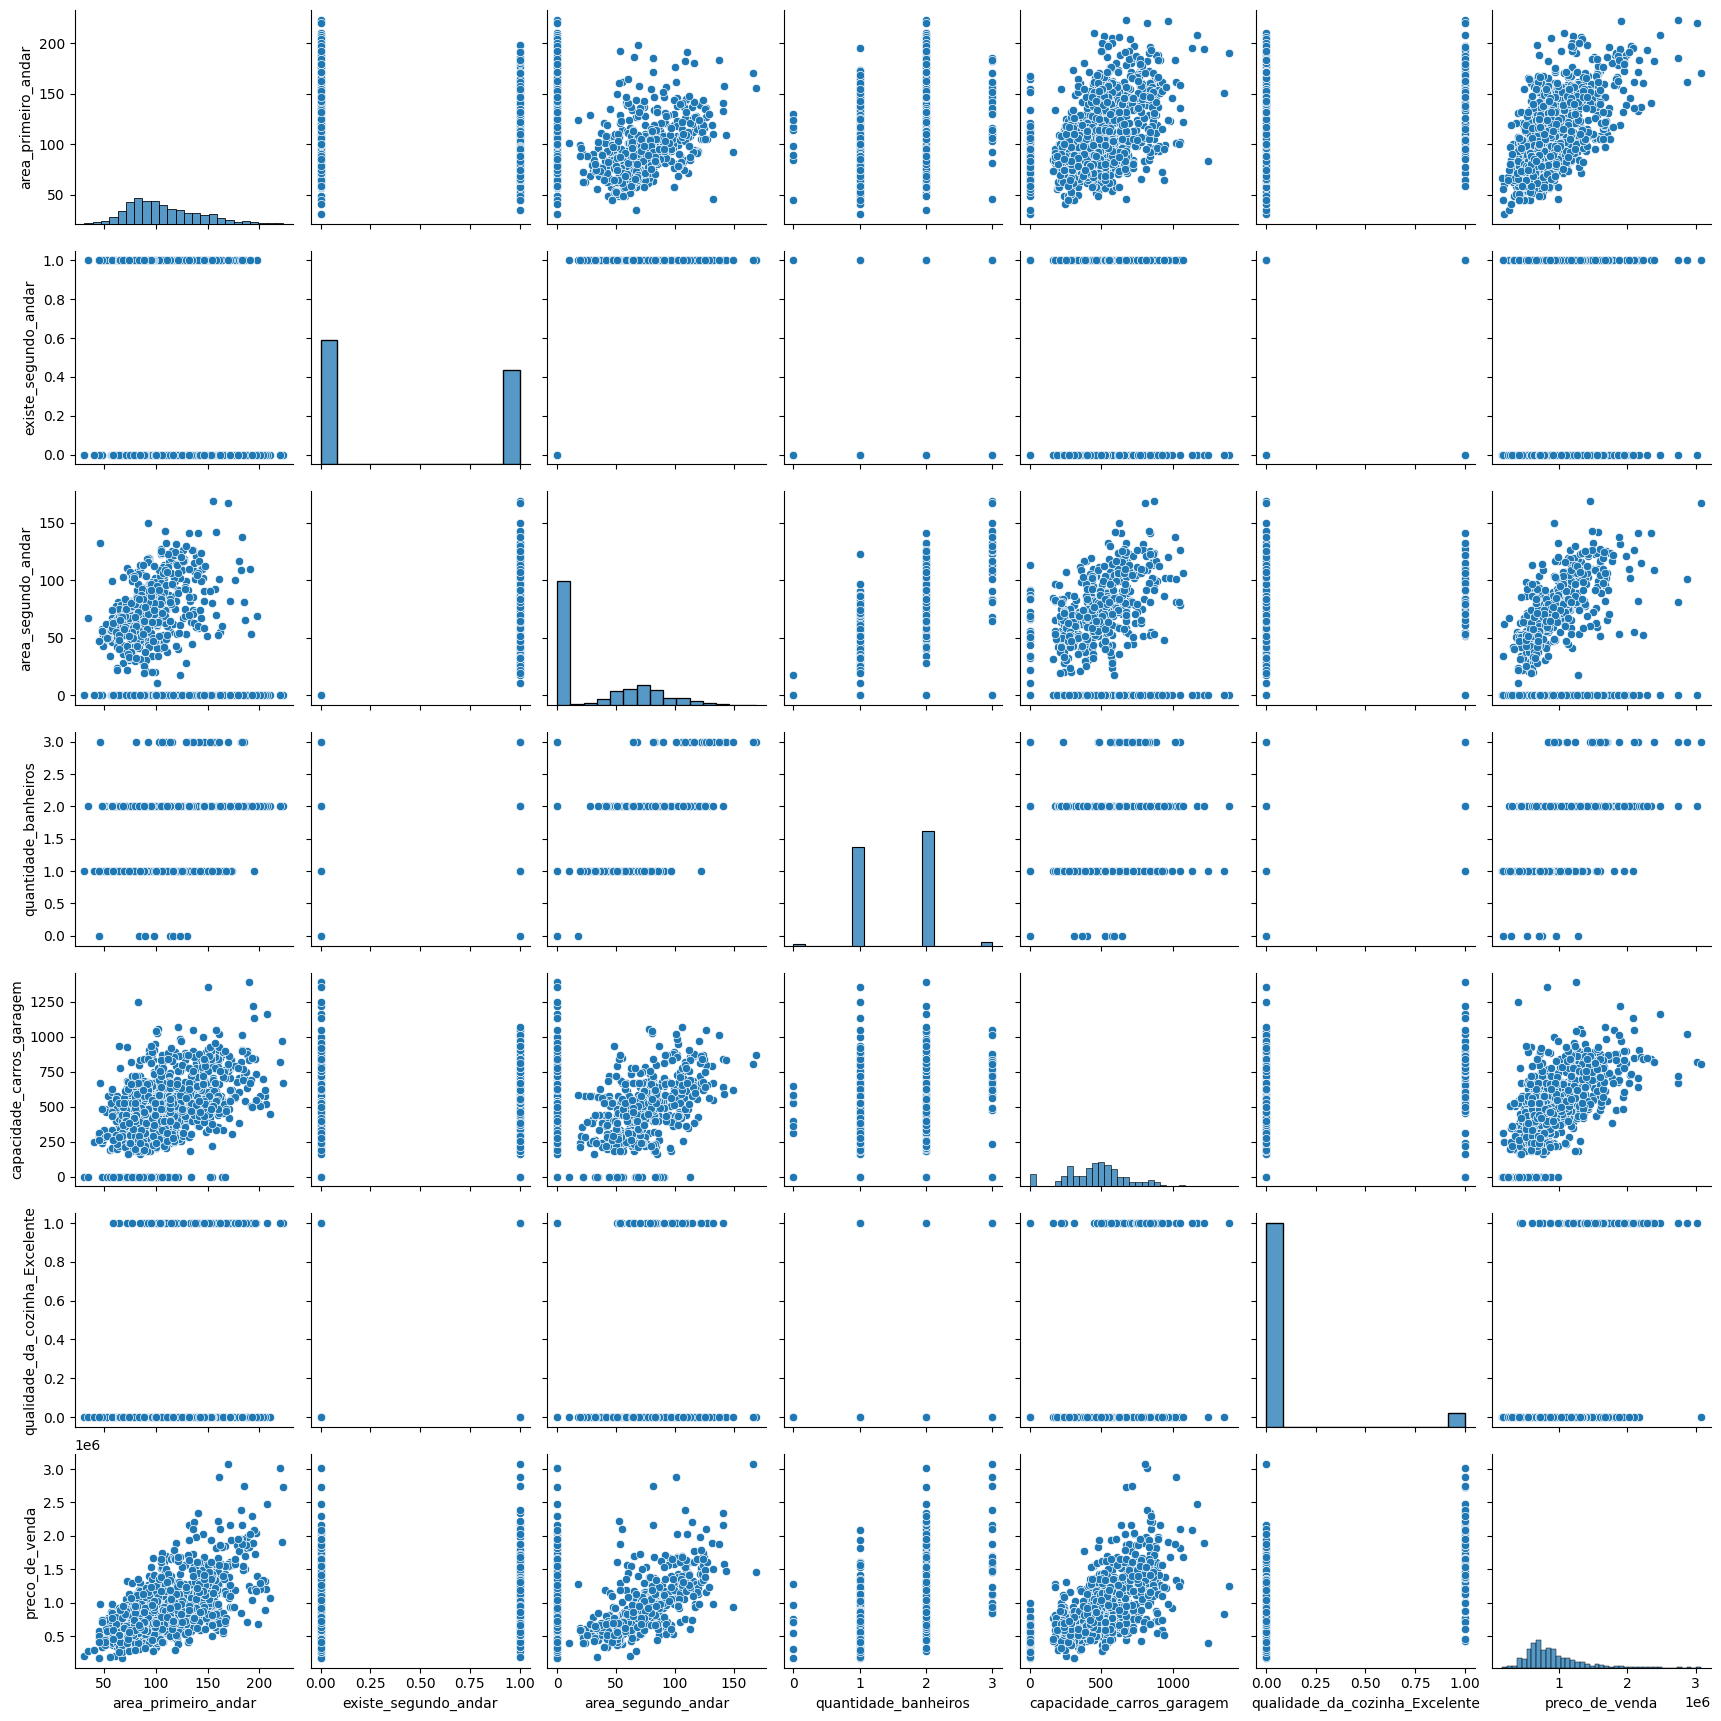

In [25]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [26]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

Uma análise que podemos fazer para identificar quais são as outras variáveis que podem justificar o preço de venda da casa

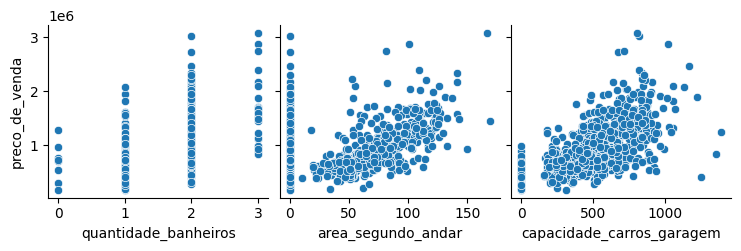

In [27]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars='preco_de_venda', x_vars = ['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [28]:
# adicionando o constante
x_train = sm.add_constant(x_train)

In [29]:
x_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

Explicando o preço da casa com base em todas essas variáveis

In [30]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  x_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [31]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  x_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [32]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  x_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [33]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     538.8
Date:                Thu, 29 May 2025   Prob (F-statistic):          5.16e-309
Time:                        17:23:44   Log-Likelihood:                -13619.
No. Observations:                1006   AIC:                         2.725e+04
Df Residuals:                     999   BIC:                         2.729e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [34]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     554.0
Date:                Thu, 29 May 2025   Prob (F-statistic):          3.59e-285
Time:                        17:23:44   Log-Likelihood:                -13677.
No. Observations:                1006   AIC:                         2.737e+04
Df Residuals:                    1000   BIC:                         2.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [35]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     493.7
Date:                Thu, 29 May 2025   Prob (F-statistic):          5.18e-235
Time:                        17:23:44   Log-Likelihood:                -13797.
No. Observations:                1006   AIC:                         2.760e+04
Df Residuals:                    1001   BIC:                         2.763e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando modelos
Qual o melhor modelo?


In [36]:
print("R²")
print("Modelo 0:", modelo_0.rsquared) #só uma variável explicativa
print("Modelo 1:", modelo_1.rsquared) 
print("Modelo 2:", modelo_2.rsquared)
print("Modelo 3:", modelo_3.rsquared)

R²
Modelo 0: 0.3636291993675236
Modelo 1: 0.7639149214486479
Modelo 2: 0.7347484696298162
Modelo 3: 0.6636001317959367


In [37]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params)) #modelo 0
print(len(modelo_1.params)) #modelo 1
print(len(modelo_2.params)) #modelo 2
print(len(modelo_3.params)) #modelo 3

2
7
6
5


O método forward selection começa com um modelo sem variáveis explicativas e adiciona uma a uma, escolhendo em cada passo a variável que mais melhora o modelo de acordo com um critério estatístico específico, como o menor valor de p-valor ou o maior aumento no R² ajustado.


O backward selection inicia com todas as variáveis possíveis no modelo e, iterativamente, remove a variável que menos contribui para o modelo, novamente baseando-se em critérios como o p-valor ou o impacto no R² ajustado.


O stepwise selection é uma combinação dos dois métodos anteriores, onde as variáveis podem ser adicionadas ou removidas em cada passo, dependendo de sua contribuição para o melhoramento do modelo.

# Precificando as casas

O modelo_3 foi escolhido para prever e precificar o valor de venda de casas. Nós já o interpretamos, e agora precisamos entender o quão bem ele se sai em casas que não fizeram parte do seu treinamento, ou seja, aquelas casas que ele não observou para estabelecer o efeito de cada variável explicativa no preço da casa.

## Obtendo o R² da previsão

In [38]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [39]:
modelo_3.params

const                            -139909.383257
area_primeiro_andar                 5897.166849
existe_segundo_andar              216194.654924
quantidade_banheiros              172321.426027
qualidade_da_cozinha_Excelente    477782.406477
dtype: float64

In [40]:
# Adicionando uma constante em X_test
x_test = sm.add_constant(x_test)


In [41]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(x_test[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']])

In [42]:
# Qual o r² da previsão?
modelo_3.rsquared

np.float64(0.6636001317959367)

In [43]:
# Qual o R² do treino?
print("R² do treino:", r2_score(y_test,predict_3))

R² do treino: 0.6058436853884375


## Precificando uma casa

In [44]:
# Novo imóvel
novo_imovel = pd.DataFrame({'const': [1],
                           'area_primeiro_andar': [120],
                           'existe_segundo_andar': [1],
                           'quantidade_banheiros': [2],
                           'qualidade_da_cozinha_Excelente': [0]})

In [45]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    974108.324652
dtype: float64

In [46]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1128588.1455879528


## Precificando várias casas

In [47]:
# Lendo várias casas?
novas_casas = pd.read_csv("C:\\Users\\mborges\\Downloads\\MLRegressionAlura\\novas_casas.csv", sep=';')
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [48]:
novas_casas = novas_casas.drop(columns = "Casa")

In [49]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)

In [50]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

0    1.783286e+06
1    1.916327e+06
2    1.606371e+06
3    2.250465e+06
4    1.626063e+06
5    1.246531e+06
6    1.379573e+06
7    1.541390e+06
8    9.713652e+05
9    1.654740e+06
dtype: float64

# Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [51]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

O que é o Fator de Multicolinearidade (VIF)?
O VIF quantifica o quanto a variância de um coeficiente estimado está inflada devido à multicolinearidade. Ele é calculado para cada variável independente do modelo.

VIF = 1: Não há correlação entre a variável e as demais.

VIF entre 1 e 5: Correlação moderada, geralmente aceitável.

VIF > 5 ou 10: Indica alta multicolinearidade, o que pode ser problemático.

In [52]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1
vif_1['vif'] = [ variance_inflation_factor(x_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [53]:
vif_1

,variavel,vif
0,const,20.849900
1,area_primeiro_andar,2.090987
2,existe_segundo_andar,7.861873
3,area_segundo_andar,8.069881
4,quantidade_banheiros,1.777582
5,capacidade_carros_garagem,1.513916
6,qualidade_da_cozinha_Excelente,1.167115


In [54]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3
vif_3['vif'] = [ variance_inflation_factor(x_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,18.608749
1,area_primeiro_andar,1.882045
2,existe_segundo_andar,1.601518
3,quantidade_banheiros,1.566404
4,qualidade_da_cozinha_Excelente,1.146313


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [55]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])

In [56]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=y_previsto_train, y= y_train      ,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

Quanto mais próximo de uma reta, melhor está sendo o previsto do real.
Quando olhamos para casas mais caras, mais para o final desse gráfico, temos pontos mais dispersos, e pode ser que exista uma limitação no nosso modelo nesse caso.
Aparentemente, o nosso modelo não está acertando tanto para estabelecer o preço de venda das casas mais caras.

In [57]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

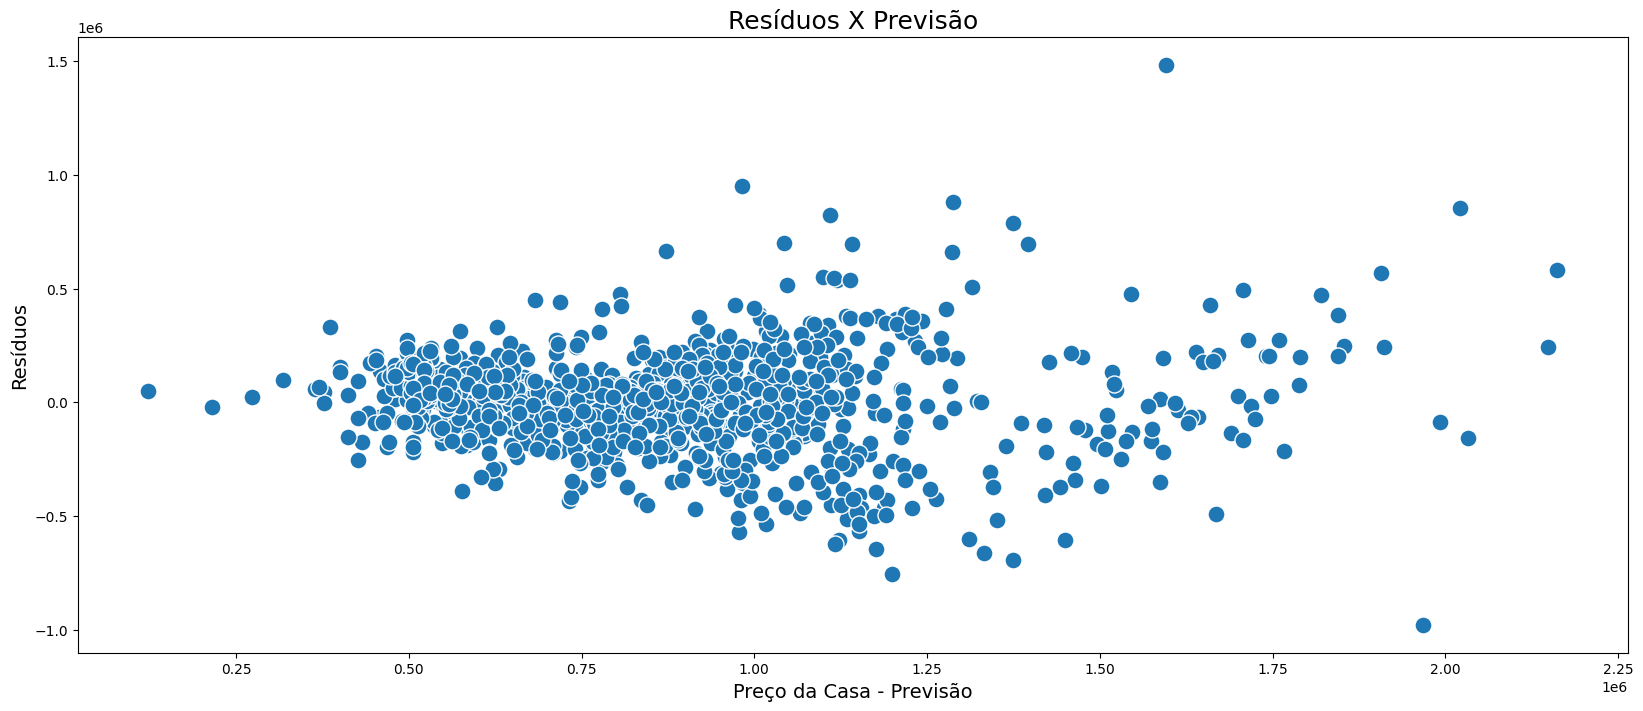

In [58]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax